### Task #3 To Explore Unsupervised Machine Learning

Clustering is an important concept when it comes to unsupervised learning. It mainly deals with finding a structure or pattern in a collection of uncategorized data. Clustering algorithms will process your data and find natural clusters(groups) if they exist in the data.

### Task
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

Dataset :
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

### Import all Dependecies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
# Importing Datset 
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exploring our DataSet

In [3]:
df.shape

(150, 6)

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking Null Values

In [7]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In this dataSet has no Null Value, So we processed ahead

### Data cleaning

Drop the Id and Species Columns

In [8]:
df.drop(['Id','Species'],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


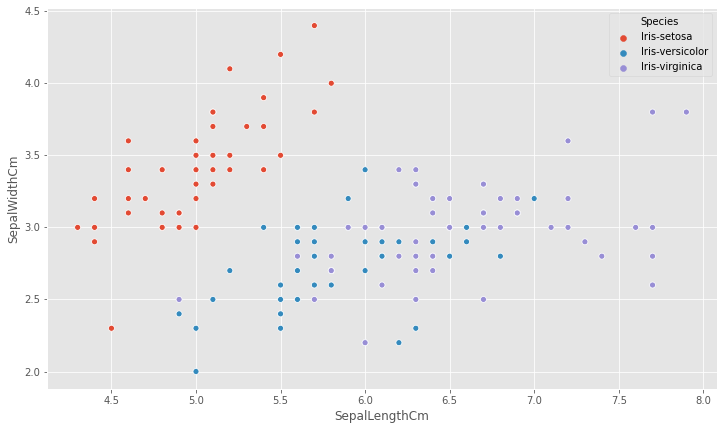

In [23]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,)
plt.show()

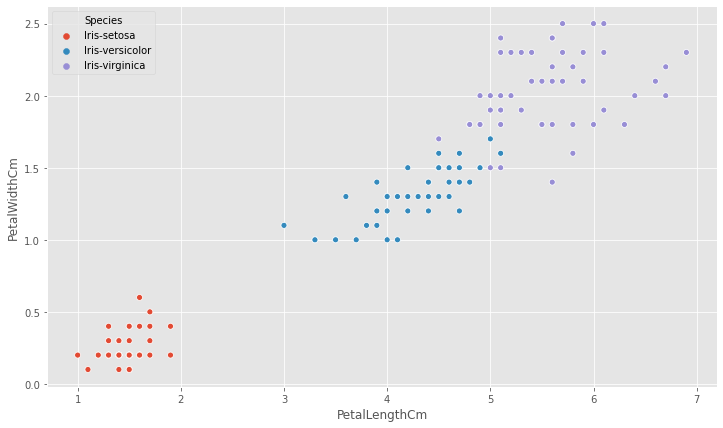

In [22]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df,)
plt.show()

### Elbow Method

To determine the optimal number of cluster, we have to select the value of K at the 'elbow' i.e the point after which the inertia start decreasing in the linear manner.

In [11]:
x=df.iloc[:,1:5].values

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.93873974358974,
 34.19068792479662,
 29.905374299825105,
 27.927882157034972,
 25.95549708624709]

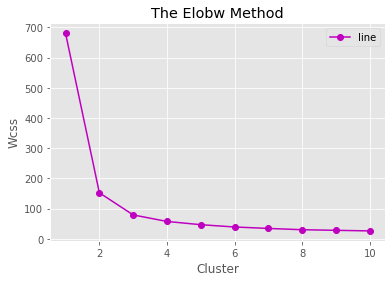

In [17]:
x_range=range(1,11)
style.use('ggplot')
plt.plot(x_range,wcss,c='m',marker='o',label='line')
plt.title("The Elobw Method")
plt.xlabel("Cluster")
plt.ylabel("Wcss")
plt.legend()
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [19]:
pred_kmeans=kmeans.fit_predict(x)
pred_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualization of Cluster

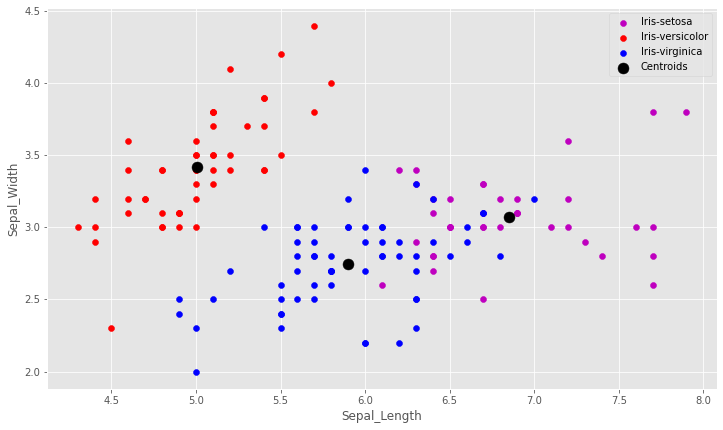

In [20]:
plt.figure(figsize=(12,7))
plt.scatter(x[pred_kmeans==0,0],x[pred_kmeans==0,1],c='m',label='Iris-setosa')
plt.scatter(x[pred_kmeans==1,0],x[pred_kmeans==1,1],c='r',label='Iris-versicolor')
plt.scatter(x[pred_kmeans==2,0],x[pred_kmeans==2,1],c='b',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='k',s=120,label='Centroids')
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.legend()
plt.show()

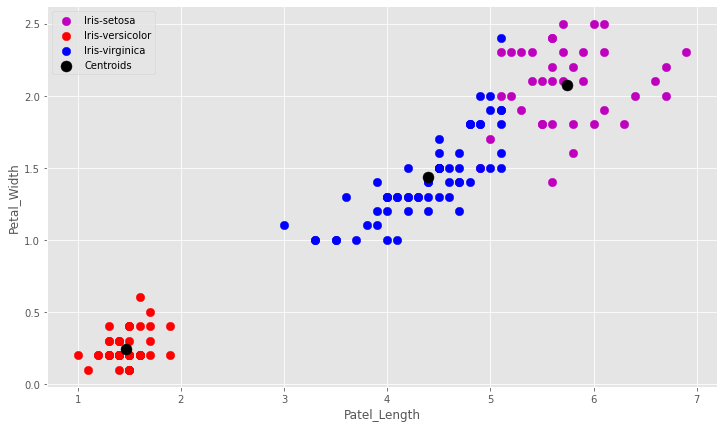

In [21]:
plt.figure(figsize=(12,7))
plt.scatter(x[pred_kmeans==0,2],x[pred_kmeans==0,3],c='m',s=70,label='Iris-setosa')
plt.scatter(x[pred_kmeans==1,2],x[pred_kmeans==1,3],c='r',s=70,label='Iris-versicolor')
plt.scatter(x[pred_kmeans==2,2],x[pred_kmeans==2,3],c='b',s=70,label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],c='k',s=120,label='Centroids')
plt.xlabel("Patel_Length")
plt.ylabel("Petal_Width")
plt.legend()
plt.show()